In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
air = pd.read_csv('./airline_passengers.csv')
air.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Time Series Forecasting

Aim: Using the past data related to time to predict the future data points.
    
Assumption: Past behaviour will influence the on the future behaviour.
    
Steps in forecasting 

1) Import the required package then import the data.

2) Identify the date column, and convert it into datetime64 format.

3) Convert the date column into index.

4) Check for any missing values in the data.

5) Replace missing values with (ffill or bfill)

6) Identifying the stationarity in the Series.

   * Visualisation (least recommended) 
   
   * Statistical test (ADF,KPSS) based on p-value we would conclude.
   
7) Converting stationry data into non stationary data.

   * Differencing
   
   * Transformation -log, sqrt, cbrt
   

## ARIMA model

Arima is a model which is used for time series forecasting. There is 3 major components in ARIMA modelling.

1) AR - Auto regressive Component

2) I - Integrated (How many times we are differencing to make the data Stationary.)

3) MA - Moving Average Component 

Atime series data using ARIMA modelcan be forecasted into 2 ways. Regression and Moving Average.

Regression - It is the forecasting values basrd on previous input vaues
        
        
            Y = mX + C + e 

Moving Average - It is forecasting the values based on previous residuals (Error)


           Y= m(Error(t)) + C + e (t-1) 


(p,d,q)

where p = AR

      d =I
      
      q =MA 
   (p,1,q)   

In [87]:
air.info() #No missing values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [88]:
air = pd.read_csv('./airline_passengers.csv',parse_dates=['Month'])
air.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [89]:
# converted object into datetime64 format.
    
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


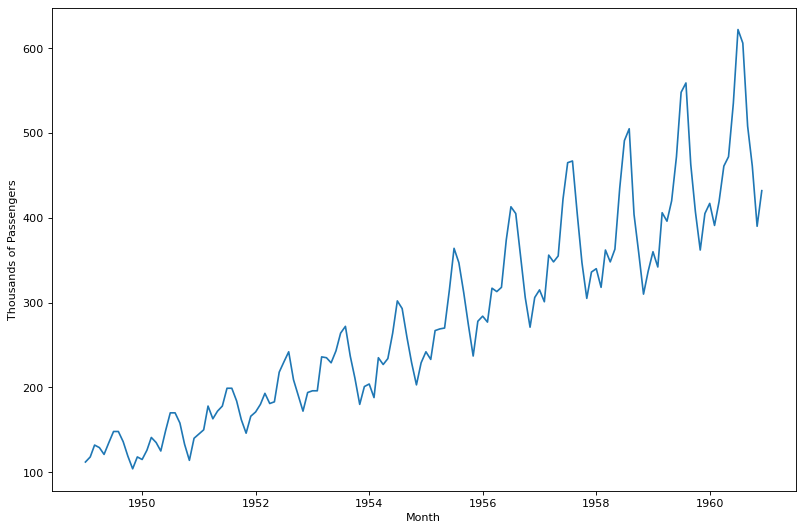

In [90]:
plt.figure(figsize=(12,8),dpi=80)
plt.plot(air['Month'],air['Thousands of Passengers'])
plt.xlabel('Month')
plt.ylabel('Thousands of Passengers')
plt.show()

the graph contain trend component and seasonal component

In [91]:
air.rename({'Thousands of Passengers':'Counts'},axis=1,inplace = True)

In [92]:
air.head()

,Month,Counts
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [93]:
air.set_index('Month',inplace = True)

In [94]:
air.head()

,Counts
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Check for stationarity

In [95]:
# We would be using adfuller test to check stationarity

from statsmodels.tsa.stattools import adfuller

In [96]:
results = adfuller(air)

In [97]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: 0.8153688792060423
p value: 0.9918802434376409
Critical values:
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The Series is not Stationary


In [98]:
# Differencing is the concept of subtracting the current value with the previous value.

air_diff1 = air.diff(1)

In [99]:
air_diff1.head()

,Counts
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [100]:
air_diff1 = air_diff1.dropna()
air_diff1.head()

,Counts
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


In [101]:
#Doing the test again to check for stationarity

results = adfuller(air_diff1)

In [102]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: -2.8292668241699874
p value: 0.05421329028382711
Critical values:
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The Series is not Stationary


In [105]:
air_diff2 = air_diff1.diff(1)
air_diff2.head()

,Counts
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0


In [106]:
air_diff2 = air_diff2.dropna()
air_diff2.head()

,Counts
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0


In [107]:
results = adfuller(air_diff2)

In [108]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: -16.384231542468513
p value: 2.7328918500142026e-29
Critical values:
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The Series is Stationary


In [109]:
#Since the data has monthly seasonality we would do the differencing with lag 12.

air_diff12 = air.diff(12)

In [110]:
air_diff12.head(50)

,Counts
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


We will now identify the 3 components of ARIMA

p

d - 1 (This is because I have done one differencing to make it stationary with lag 12)

q

For identifying p and q component we need 2 graphs

P - can be identified using the PACF plot

Q - can be identified using ACF plot

In [111]:
#Let us plot the acf graph

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

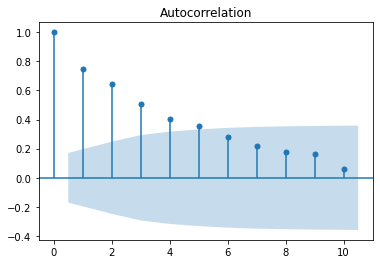

In [112]:
acf = plot_acf(air_diff12['Counts'].dropna(),lags=10) #ACF plot gives you the q OR(Q) value.

We would choose the value of q to be 5 since after 5 lags the series becomes insignificant . the blue hightlighted area is the insignificant area.

We will start with the 2nd Pole as 1st will be neglected coz it is lag0 value.

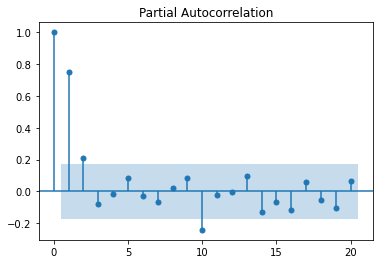

In [113]:
pacf = plot_pacf(air_diff12['Counts'].dropna(),lags=20) #PACF plot gives you the p value

We would choose the value of p to be 2 since after 2 lags the series becomes insignificant

In [114]:
# The order for my model is (p,d,q) = (2,1,5)

# Building ARIMA model

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
air.head()

,Counts
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [51]:
#Let us split the data into train and test
len(air)

144

In [52]:
#We would use 120 months data for training and 24 months of data for testing
train = air.iloc[:120]
test = air.iloc[120:]

In [53]:
len(train), len(test)

(120, 24)

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
model = ARIMA(train,order=(2,1,5))

In [61]:
arima = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48414D+00    |proj g|=  2.40840D-01

At iterate    5    f=  4.47389D+00    |proj g|=  2.85943D-02

At iterate   10    f=  4.46914D+00    |proj g|=  1.27886D-02

At iterate   15    f=  4.46742D+00    |proj g|=  2.96499D-02

At iterate   20    f=  4.46620D+00    |proj g|=  5.66232D-03

At iterate   25    f=  4.46579D+00    |proj g|=  3.58771D-03

At iterate   30    f=  4.46576D+00    |proj g|=  1.64757D-04

At iterate   35    f=  4.46576D+00    |proj g|=  2.19025D-04

At iterate   40    f=  4.46576D+00    |proj g|=  3.87246D-05

At iterate   45    f=  4.46576D+00    |proj g|=  6.23501D-05

At iterate   50    f=  4.46576D+00    |proj g|=  8.89067D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [62]:
test.index[0], test.index[-1]

(Timestamp('1959-01-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [63]:
start = test.index[0]
end = test.index[-1]

In [64]:
test['Prediction'] = arima.predict(start=start,end=end)

In [65]:
test.head()

,Counts,Prediction
Month,,
1959-01-01,360,75.122195
1959-02-01,342,33.562619
1959-03-01,406,10.875442
1959-04-01,396,-35.882406
1959-05-01,420,-39.427967


In [66]:
#To evaluate the model we would use a metric MAPE
from sklearn.metrics import mean_absolute_percentage_error

In [68]:
print(mean_absolute_percentage_error(test['Counts'],test['Prediction']))

0.988813445185186


<AxesSubplot:xlabel='Month'>

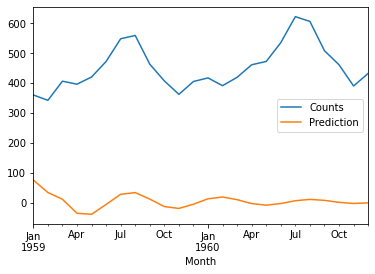

In [70]:
test[['Counts','Prediction']].plot()

### It shows the error in prediction is high. Because of the seasonality component , so we goona use a model called SARIMA which will take seasonality component into consideration

In [72]:
#Creating a SARIMAX model to deal with seasonality
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [79]:
model_SARIMA = SARIMAX(train,order=(2,1,5),seasonal_order=(2,1,5,12))

In [80]:
SARIMA = model_SARIMA.fit() 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30565D+00    |proj g|=  8.58516D-02

At iterate    5    f=  3.28238D+00    |proj g|=  1.47801D-02

At iterate   10    f=  3.26688D+00    |proj g|=  1.61389D-02

At iterate   15    f=  3.26355D+00    |proj g|=  9.63607D-03

At iterate   20    f=  3.25713D+00    |proj g|=  1.05012D-02

At iterate   25    f=  3.25441D+00    |proj g|=  4.14548D-03

At iterate   30    f=  3.25342D+00    |proj g|=  2.47355D-03

At iterate   35    f=  3.25177D+00    |proj g|=  1.02711D-02

At iterate   40    f=  3.24948D+00    |proj g|=  4.34113D-03

At iterate   45    f=  3.24626D+00    |proj g|=  7.46272D-03

At iterate   50    f=  3.24486D+00    |proj g|=  4.55889D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [81]:
test['Prediction SARIMA'] = SARIMA.predict(start=start,end=end)

In [82]:
test.head()

,Counts,Prediction,Prediction SARIMA
Month,,,
1959-01-01,360,75.122195,355.092100
1959-02-01,342,33.562619,324.229525
1959-03-01,406,10.875442,382.894391
1959-04-01,396,-35.882406,369.002845
1959-05-01,420,-39.427967,387.374377


<AxesSubplot:xlabel='Month'>

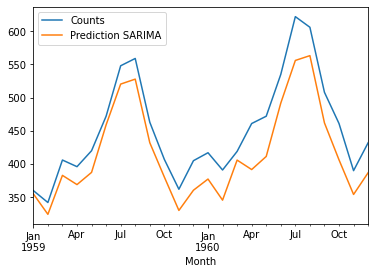

In [83]:
test[['Counts','Prediction SARIMA']].plot()

In [84]:
val_pred = SARIMA.predict(start="1961-01-01",end="1961-12-01")

In [85]:
val_pred

1961-01-01    405.425734
1961-02-01    370.782680
1961-03-01    436.234690
1961-04-01    422.526629
1961-05-01    443.699900
1961-06-01    527.677620
1961-07-01    596.097238
1961-08-01    603.503843
1961-09-01    495.804148
1961-10-01    436.064043
1961-11-01    379.607093
1961-12-01    413.493884
Freq: MS, Name: predicted_mean, dtype: float64

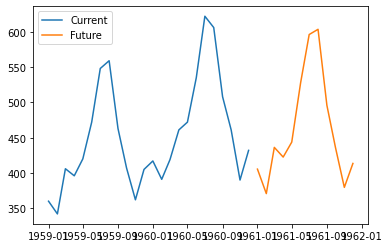

In [87]:
plt.plot(test['Counts'])
plt.plot(val_pred)
plt.legend(['Current','Future'])